In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [17]:
file_name = "customer_churn_large_dataset.xlsx"
initial_df = pd.read_excel(file_name)
print("Head \n", initial_df.head(), "\n\n")
print("Describe \n",initial_df.describe(), "\n\n")

Head 
    CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0   


Describe 
           CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.2802

// Cleaning Phase 1

In [18]:
clean1_df = initial_df.drop(['Name', 'CustomerID'],   axis=1)
clean1_df['Gender'] = clean1_df['Gender'].replace(['Male', 'Female'], [1, 0])
print("Head \n", clean1_df.head(), "\n\n")
print("Describe \n",clean1_df.describe(), "\n\n")

Head 
    Age  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
0   63       1  Los Angeles                          17         73.36   
1   62       0     New York                           1         48.76   
2   24       0  Los Angeles                           5         85.47   
3   36       0        Miami                           3         97.94   
4   46       0        Miami                          19         58.14   

   Total_Usage_GB  Churn  
0             236      0  
1             172      0  
2             460      0  
3             297      1  
4             266      0   


Describe 
                  Age         Gender  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean       44.027020       0.497840                   12.490100   
std        15.280283       0.499998                    6.926461   
min        18.000000       0.000000                    1.000000   
25%        31.000000       0.000000        

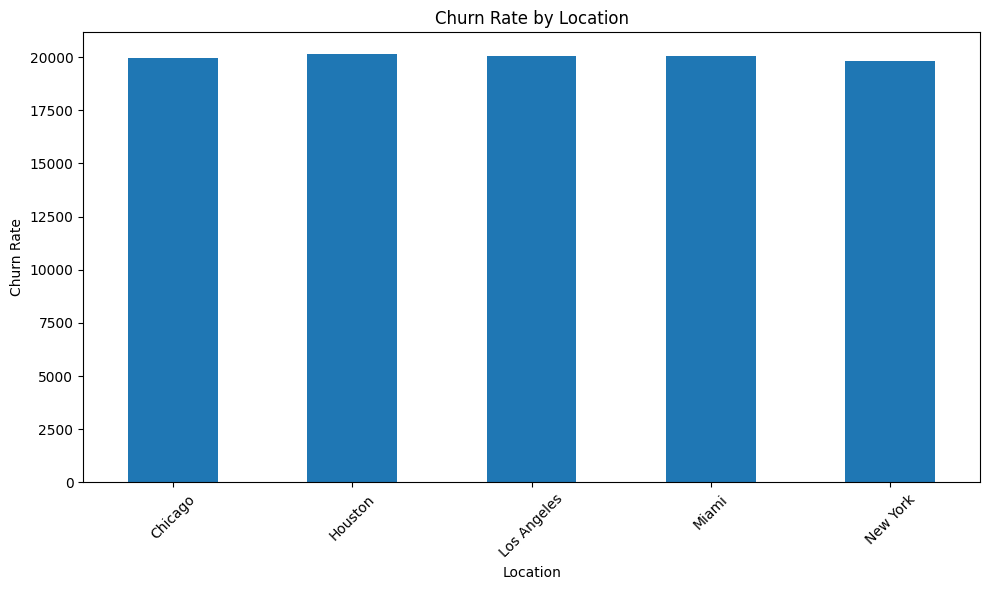

In [19]:
location_churn = clean1_df.groupby('Location')['Churn'].count()
plt.figure(figsize=(10, 6))
location_churn.plot(kind='bar')
plt.title('Churn Rate by Location')
plt.xlabel('Location')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

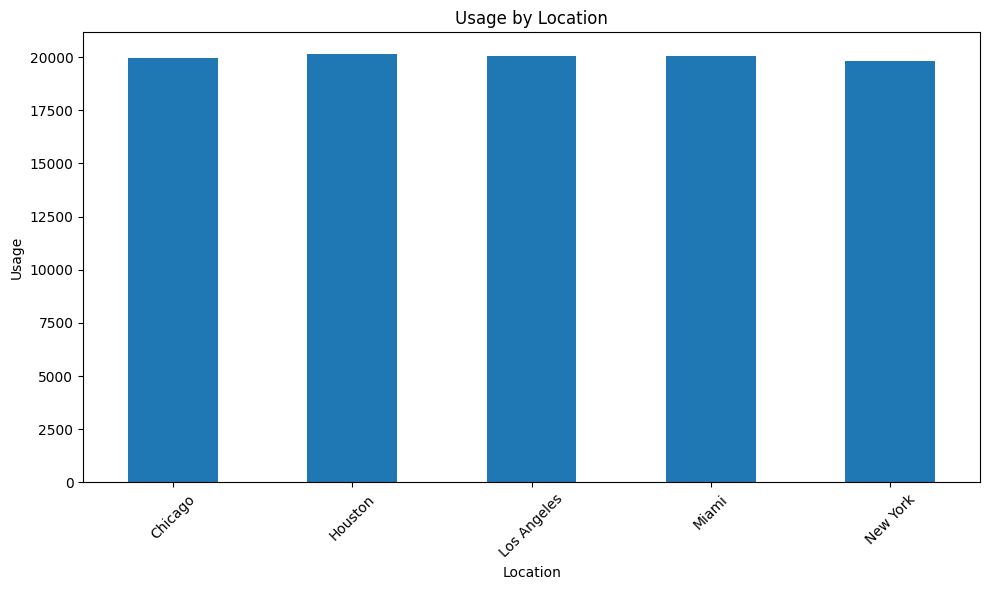

In [20]:
location_usage = clean1_df.groupby('Location')['Total_Usage_GB'].count()
plt.figure(figsize=(10, 6))
location_usage.plot(kind='bar')
plt.title('Usage by Location')
plt.xlabel('Location')
plt.ylabel('Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Location not affecting any data. Therefore location can be removed
clean1_df = clean1_df.drop(['Location'],   axis=1)
print("Head \n", clean1_df.head(), "\n\n")
clean1_df.describe()

Head 
    Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0   63       1                          17         73.36             236   
1   62       0                           1         48.76             172   
2   24       0                           5         85.47             460   
3   36       0                           3         97.94             297   
4   46       0                          19         58.14             266   

   Churn  
0      0  
1      0  
2      0  
3      1  
4      0   




,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,0.497840,12.490100,65.053197,274.393650,0.497790
std,15.280283,0.499998,6.926461,20.230696,130.463063,0.499998
min,18.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,0.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,0.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,1.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,1.000000,24.000000,100.000000,500.000000,1.000000


// Cleaning Phase 2

In [22]:
clean2_df = clean1_df
clean2_df["Avg_Monthly_Usage"] = clean2_df['Total_Usage_GB']/clean2_df['Subscription_Length_Months']
clean2_df['Bill_Per_GB'] = clean2_df['Monthly_Bill']/clean2_df['Avg_Monthly_Usage']
print("Head \n", clean2_df.head(), "\n\n")
print("Describe \n",clean2_df.describe(), "\n\n")

Head 
    Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0   63       1                          17         73.36             236   
1   62       0                           1         48.76             172   
2   24       0                           5         85.47             460   
3   36       0                           3         97.94             297   
4   46       0                          19         58.14             266   

   Churn  Avg_Monthly_Usage  Bill_Per_GB  
0      0          13.882353     5.284407  
1      0         172.000000     0.283488  
2      0          92.000000     0.929022  
3      1          99.000000     0.989293  
4      0          14.000000     4.152857   


Describe 
                  Age         Gender  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean       44.027020       0.497840                   12.490100   
std        15.280283       0.499998                    6.926461

In [23]:
mean_Avg_Monthly_Usage = clean2_df['Avg_Monthly_Usage'].mean()
std_dev_Avg_Monthly_Usage = clean2_df['Avg_Monthly_Usage'].std()
clean3_df = clean2_df[(clean2_df['Avg_Monthly_Usage'] - mean_Avg_Monthly_Usage).abs() <= (3*std_dev_Avg_Monthly_Usage)]
print("Head \n", clean3_df.head(), "\n\n")
print("Describe \n",clean3_df.describe(), "\n\n")

Head 
    Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0   63       1                          17         73.36             236   
1   62       0                           1         48.76             172   
2   24       0                           5         85.47             460   
3   36       0                           3         97.94             297   
4   46       0                          19         58.14             266   

   Churn  Avg_Monthly_Usage  Bill_Per_GB  
0      0          13.882353     5.284407  
1      0         172.000000     0.283488  
2      0          92.000000     0.929022  
3      1          99.000000     0.989293  
4      0          14.000000     4.152857   


Describe 
                 Age        Gender  Subscription_Length_Months  Monthly_Bill  \
count  97385.000000  97385.000000                97385.000000  97385.000000   
mean      44.032397      0.497797                   12.796806     65.044050   
std       15.280081      0.

In [24]:
mean_Bill_Per_GB = clean2_df['Bill_Per_GB'].mean()
std_dev_Bill_Per_GB = clean2_df['Bill_Per_GB'].std()
clean3_df = clean2_df[(clean2_df['Bill_Per_GB'] - mean_Bill_Per_GB).abs() <= (3*std_dev_Bill_Per_GB)]
print("Head \n", clean3_df.head(), "\n\n")
print("Describe \n",clean3_df.describe(), "\n\n")

Head 
    Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0   63       1                          17         73.36             236   
1   62       0                           1         48.76             172   
2   24       0                           5         85.47             460   
3   36       0                           3         97.94             297   
4   46       0                          19         58.14             266   

   Churn  Avg_Monthly_Usage  Bill_Per_GB  
0      0          13.882353     5.284407  
1      0         172.000000     0.283488  
2      0          92.000000     0.929022  
3      1          99.000000     0.989293  
4      0          14.000000     4.152857   


Describe 
                 Age        Gender  Subscription_Length_Months  Monthly_Bill  \
count  97615.000000  97615.000000                97615.000000  97615.000000   
mean      44.021093      0.497045                   12.305517     64.650399   
std       15.283479      0.

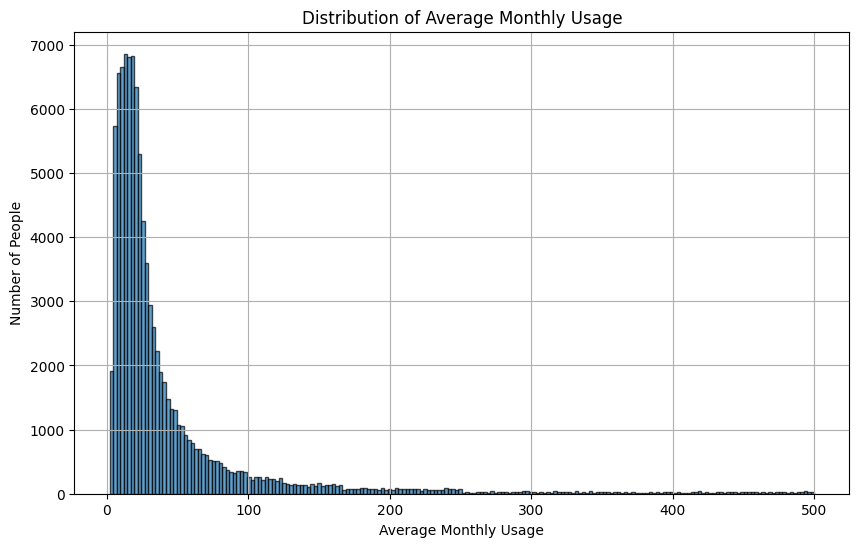

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(clean3_df['Avg_Monthly_Usage'], bins=200, edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Monthly Usage')
plt.xlabel('Average Monthly Usage')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

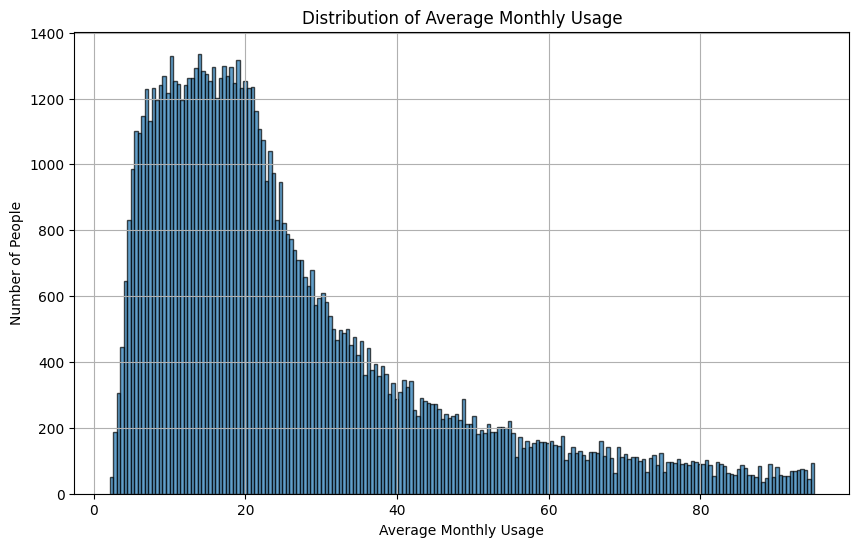

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Avg_Monthly_Usage,Bill_Per_GB
count,87614.000000,87614.000000,87614.000000,87614.000000,87614.000000,87614.000000,87614.000000,87614.000000
mean,44.026560,0.496291,13.470906,64.583484,271.513936,0.497523,26.244101,4.080001
std,15.297069,0.499989,6.283591,20.191886,127.936699,0.499997,19.439587,3.334662
min,18.000000,0.000000,1.000000,30.000000,50.000000,0.000000,2.083333,0.331162
25%,31.000000,0.000000,8.000000,47.120000,161.000000,0.000000,12.434783,1.729609
50%,44.000000,0.000000,13.000000,64.270000,268.000000,0.000000,20.428571,3.039678
75%,57.000000,1.000000,19.000000,82.040000,381.000000,1.000000,33.769231,5.247434
max,70.000000,1.000000,24.000000,100.000000,500.000000,1.000000,95.000000,17.882553


In [26]:
# Making a better fit to the normal curve
clean3_df = clean3_df[clean3_df['Avg_Monthly_Usage'] < clean2_df['Avg_Monthly_Usage'].quantile(0.9) ]
plt.figure(figsize=(10, 6))
plt.hist(clean3_df['Avg_Monthly_Usage'], bins=200, edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Monthly Usage')
plt.xlabel('Average Monthly Usage')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()
clean3_df.describe()

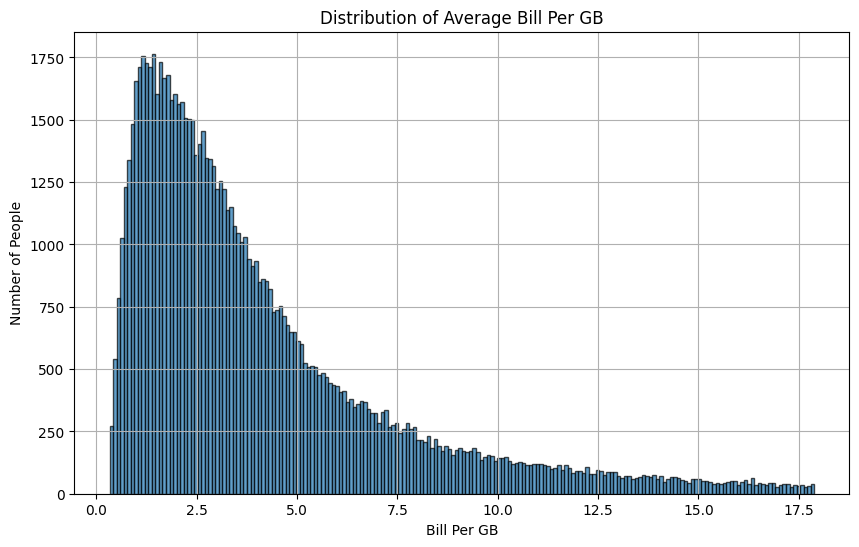

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(clean3_df['Bill_Per_GB'], bins=200, edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Bill Per GB')
plt.xlabel('Bill Per GB')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

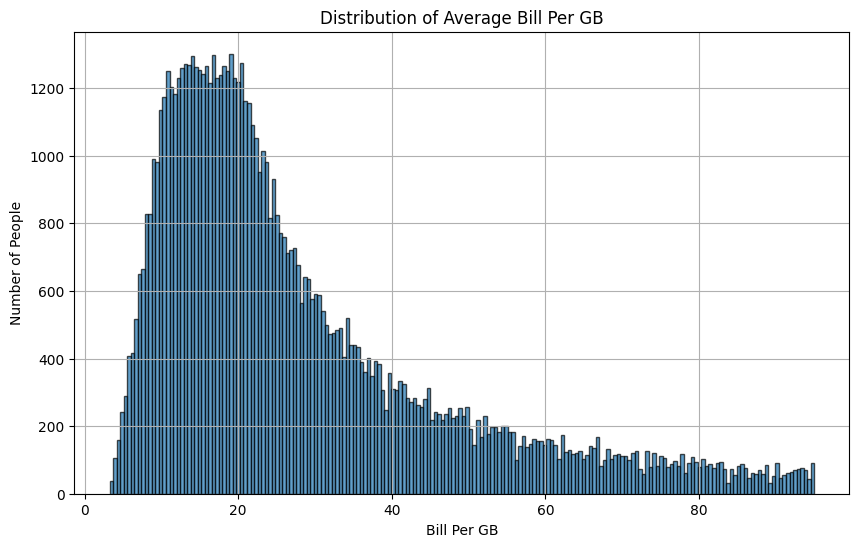

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Avg_Monthly_Usage,Bill_Per_GB
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,0.497840,12.490100,65.053197,274.393650,0.497790,43.349682,4.179308
std,15.280283,0.499998,6.926461,20.230696,130.463063,0.499998,65.786483,4.569199
min,18.000000,0.000000,1.000000,30.000000,50.000000,0.000000,2.083333,0.061145
25%,31.000000,0.000000,6.000000,47.540000,161.000000,0.000000,12.687500,1.371825
50%,44.000000,0.000000,12.000000,65.010000,274.000000,0.000000,21.909091,2.782978
75%,57.000000,1.000000,19.000000,82.640000,387.000000,1.000000,42.545455,5.131878
max,70.000000,1.000000,24.000000,100.000000,500.000000,1.000000,500.000000,45.816000


In [28]:
# Making a better fit to the normal curve
clean3_df = clean3_df[(clean3_df['Bill_Per_GB'] < clean2_df['Bill_Per_GB'].quantile(0.9))]
plt.figure(figsize=(10, 6))
plt.hist(clean3_df['Avg_Monthly_Usage'], bins=200, edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Bill Per GB')
plt.xlabel('Bill Per GB')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()
clean2_df.describe()

// Correlation Matrix

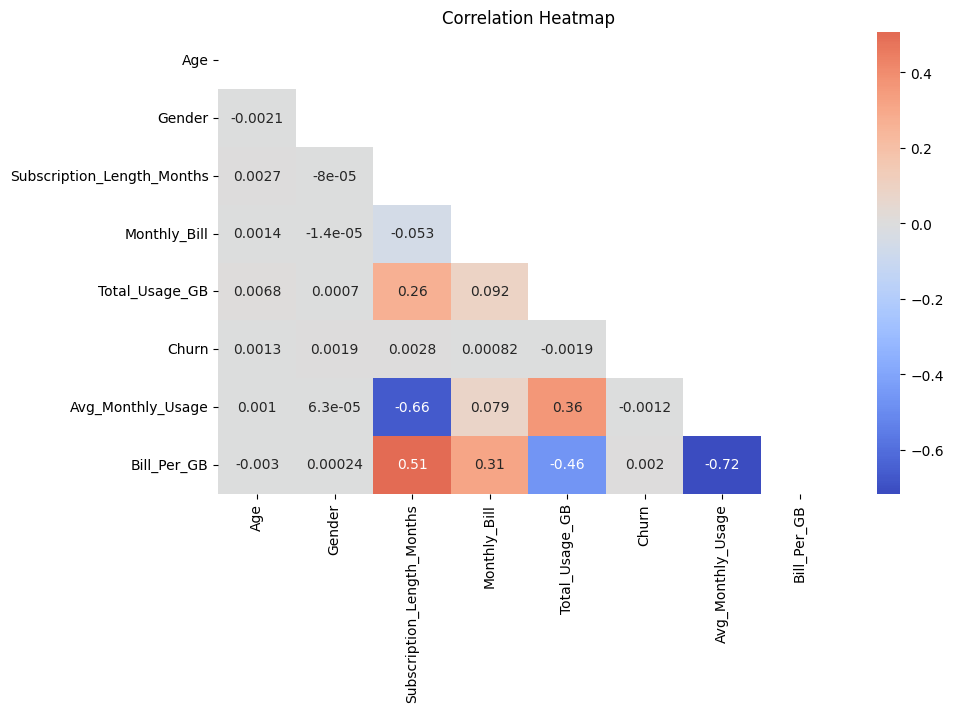

Monthly_Bill                  0.000817
Avg_Monthly_Usage             0.001239
Age                           0.001347
Total_Usage_GB                0.001884
Gender                        0.001940
Bill_Per_GB                   0.001978
Subscription_Length_Months    0.002840
Churn                         1.000000
Name: Churn, dtype: float64

In [34]:
corr = clean3_df.corr()
mask = np.triu(corr)
plt.figure(figsize=(10, 6))
sb.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, center=0)
plt.title('Correlation Heatmap')
plt.show()
corr['Churn'].abs().sort_values()

In [40]:
needed_columns = list(corr['Churn'].abs().sort_values(ascending=False).index[0:5])
final_df = clean3_df[needed_columns]
print("Head \n", final_df.head(), "\n\n")
print("Describe \n",final_df.describe(), "\n\n")

Head 
    Churn  Subscription_Length_Months  Bill_Per_GB  Gender  Total_Usage_GB
0      0                          17     5.284407       1             236
2      0                           5     0.929022       0             460
4      0                          19     4.152857       0             266
5      1                          15     2.718750       1             456
6      0                           3     0.822937       0             269 


Describe 
               Churn  Subscription_Length_Months   Bill_Per_GB        Gender  \
count  79999.000000                79999.000000  79999.000000  79999.000000   
mean       0.497106                   13.034288      3.282580      0.495856   
std        0.499995                    6.255017      2.085140      0.499986   
min        0.000000                    1.000000      0.331162      0.000000   
25%        0.000000                    8.000000      1.630586      0.000000   
50%        0.000000                   13.000000      2.782992

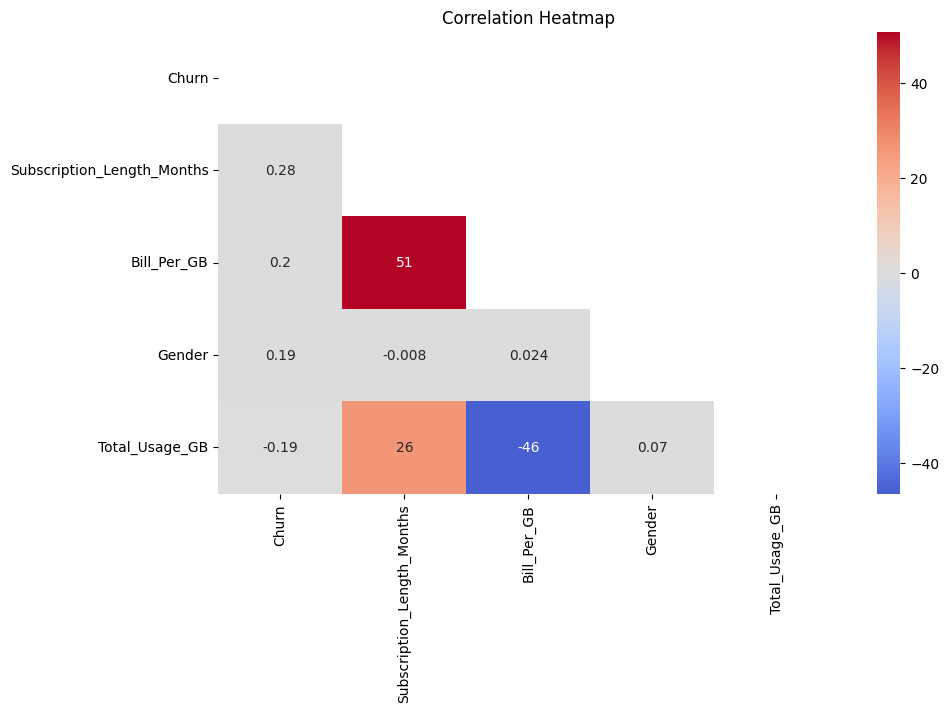

In [74]:
corr = final_df.corr()*100
mask = np.triu(corr)
plt.figure(figsize=(10, 6))
sb.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, center=0)
plt.title('Correlation Heatmap')
plt.show()

// Train Test Split

In [42]:
X = final_df.drop('Churn', axis=1)
Y = final_df["Churn"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=33)

// Model

  /// KNN

In [45]:
knns = [
    ('3-Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)),
    ('5-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('7-Nearest Neighbors', KNeighborsClassifier(n_neighbors=7)),
    ('25-Nearest Neighbors', KNeighborsClassifier(n_neighbors=25)),
    ('101-Nearest Neighbors', KNeighborsClassifier(n_neighbors=101))
]
for name, knn in knns:
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {np.mean(scores)}, Standard Deviation = {np.std(scores)}")

3-Nearest Neighbors: Mean Accuracy = 0.5023938144571536, Standard Deviation = 0.002944971331336216
5-Nearest Neighbors: Mean Accuracy = 0.5009937652353272, Standard Deviation = 0.0035770764049465977
7-Nearest Neighbors: Mean Accuracy = 0.49959377695480967, Standard Deviation = 0.004486975668120538
25-Nearest Neighbors: Mean Accuracy = 0.5000936964810301, Standard Deviation = 0.003217335784844963
101-Nearest Neighbors: Mean Accuracy = 0.4980437214825926, Standard Deviation = 0.0015051535767381656


In [48]:
# 3 NEIGHBOUR GIVES BEST ACCURACY
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)
print(accuracy_score(Y_test, knn_model.predict(X_test))*100,'%')
print(confusion_matrix(Y_test, knn_model.predict(X_test)))

50.475 %
[[3101 2889]
 [3054 2956]]


In [57]:
print(accuracy_score(Y_test, (knn_model.predict_proba(X_test)[:,1]>0.27).astype(int))*100,'%')
print(confusion_matrix(Y_test, (knn_model.predict_proba(X_test)[:,1]>0.27).astype(int)))

49.90833333333333 %
[[ 779 5211]
 [ 800 5210]]


/// Logistic Regression

In [58]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train )
print(accuracy_score(Y_test, log_model.predict(X_test))*100,'%')
print(confusion_matrix(Y_test, log_model.predict(X_test)))

49.425000000000004 %
[[4910 1080]
 [4989 1021]]


In [64]:
print(accuracy_score(Y_test, (log_model.predict_proba(X_test)[:,1]>0.9).astype(int))*100,'%')
print(confusion_matrix(Y_test, (log_model.predict_proba(X_test)[:,1]>0.9).astype(int)))
# 0.5 Giving best result taking confusion matrix into condsideration

49.916666666666664 %
[[5990    0]
 [6010    0]]


/// Neural Network

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
nn_model.fit(X_train_scaled, Y_train )
print(accuracy_score(Y_test, nn_model.predict(X_test_scaled))*100,'%')
print(confusion_matrix(Y_test, nn_model.predict(X_test_scaled)))

49.583333333333336 %
[[3687 2303]
 [3747 2263]]


// KNN Performance Evaluation

In [71]:
Y_pred = knn_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate a classification report
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.50475
Precision: 0.5057313943541488
Recall: 0.491846921797005
F1-score: 0.498692534795445
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      5990
           1       0.51      0.49      0.50      6010

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



/ CONCLUSION:


*   Churn not dependent on the variables given in the dataset
*   Churn looks like a random variable in context to the variables given in the dataset and hence the prediction accuracy is around 50%

